# Logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('insurance_data.csv')

In [3]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


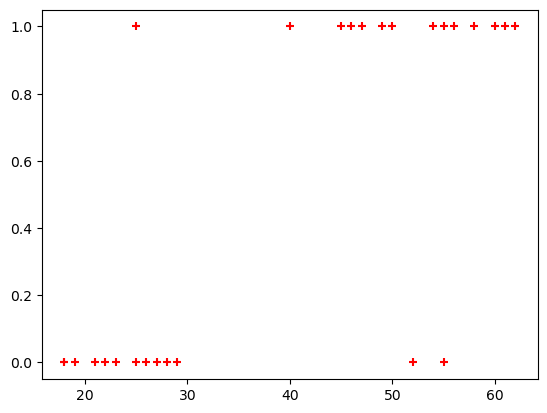

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [13]:
x,xtes,y,ytes=train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [14]:
xtes

,age
0,22
16,25
13,29


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model= LogisticRegression()

In [17]:
model.fit(x,y)

LogisticRegression()

In [18]:
model.predict(xtes)

array([0, 0, 0], dtype=int64)

In [19]:
ytes

0     0
16    1
13    0
Name: bought_insurance, dtype: int64

In [20]:
model.score(xtes,ytes)

0.6666666666666666

In [21]:
# get the probability
model.predict_proba(xtes)

array([[0.95721371, 0.04278629],
       [0.93181308, 0.06818692],
       [0.87627736, 0.12372264]])

In [22]:
model.predict(xtes)

array([0, 0, 0], dtype=int64)

# Multi class classififcation

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [24]:
digits = load_digits()

In [25]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [29]:
digits.data[0].astype(int)

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0])

<Figure size 640x480 with 0 Axes>

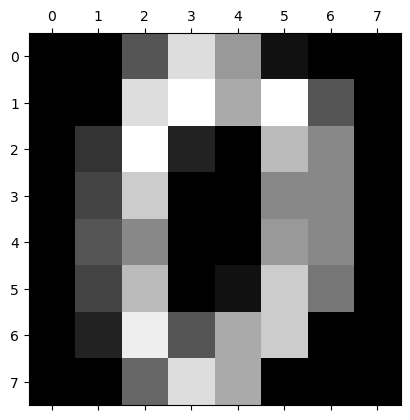

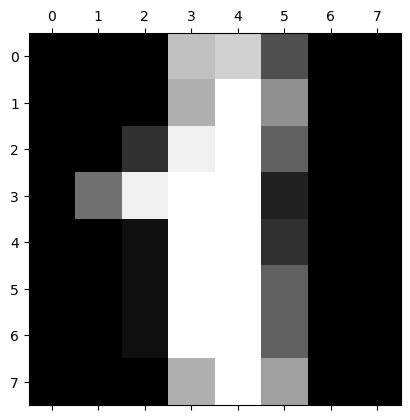

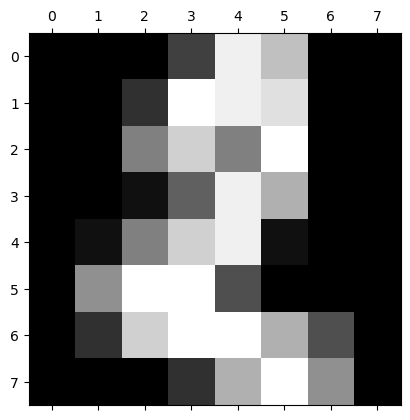

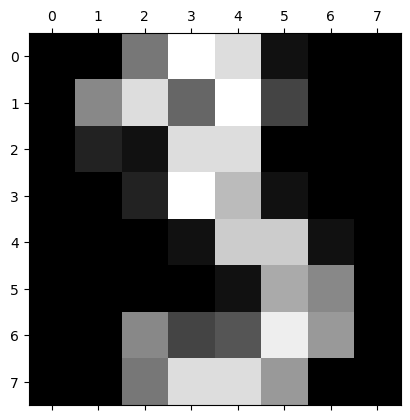

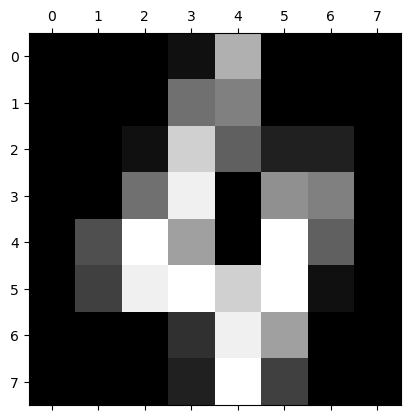

In [34]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [81]:
 digits.target[0:5]

array([0, 1, 2, 3, 4])

In [40]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain,xtes,ytrain,ytes=train_test_split(digits.data,digits.target,test_size=0.2)

In [51]:
len(xtrain)

1437

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [57]:
model=LogisticRegression(max_iter=2000)

In [61]:
##scaler = StandardScaler()
##xtrain_scaled = scaler.fit_transform(xtrain)
##xtest_scaled = scaler.transform(xtes)

In [88]:
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [90]:
model.predict(xtes[0:10])

array([6, 9, 5, 9, 1, 6, 4, 0, 7, 9])

In [91]:
ytes[0:10]

array([6, 9, 8, 9, 1, 6, 4, 0, 7, 9])

In [92]:
model.score(xtes,ytes)

0.9861111111111112

In [93]:
digits.target[67]

6

In [94]:
model.predict(digits.data[[67]])

array([6])

In [95]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## Confusion Matrix

In [96]:
pred=model.predict(xtes)
from sklearn.metrics import confusion_matrix

In [97]:
c=confusion_matrix(ytes,pred)
c

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]], dtype=int64)

Text(95.72222222222221, 0.5, 'actual')

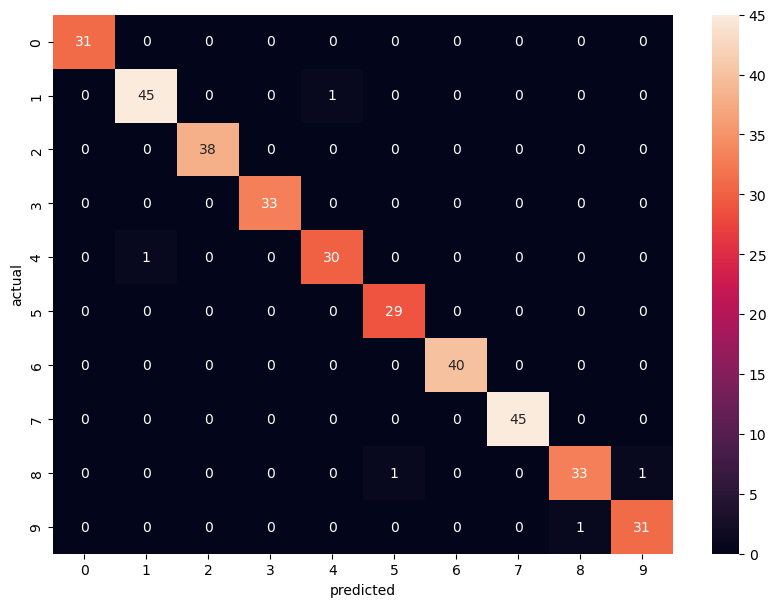

In [99]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(c,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

# Excercise

In [100]:
from sklearn import datasets
iris = datasets.load_iris()

In [103]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [105]:
atrain,atest,btrain,btest=train_test_split(iris.data,iris.target,train_size=0.8)

In [107]:
model2=LogisticRegression()
model2.fit(atrain,btrain)

LogisticRegression()

In [110]:
model2.predict(atest)

array([0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 0, 1, 0, 2, 1, 0, 2])

In [111]:
btest

array([0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 0, 1, 0, 2, 1, 0, 2])

In [120]:
pred2=model2.predict(atest)
a=confusion_matrix(btest,pred2)

Text(95.72222222222221, 0.5, 'actual')

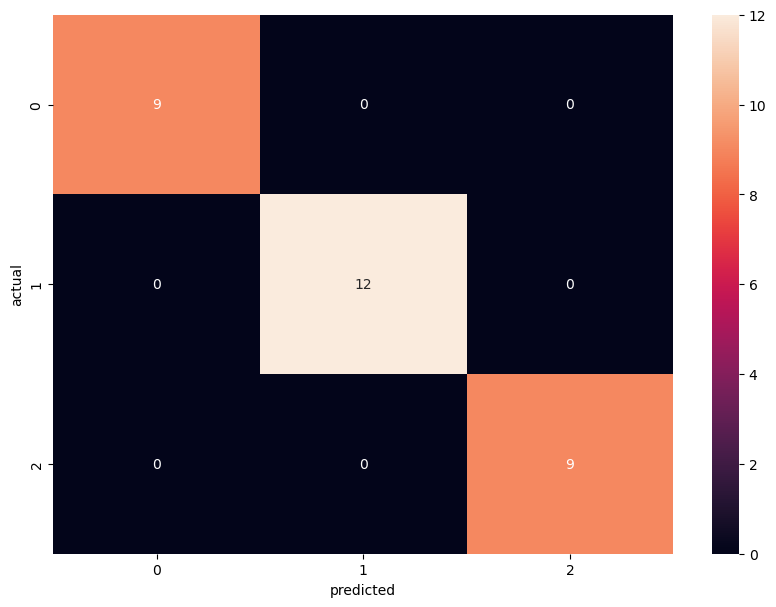

In [121]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(a,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')

In [122]:
model2.score(atest,btest)

1.0

In [124]:
model2.predict_proba(atest)

array([[9.68073890e-01, 3.19259570e-02, 1.52813692e-07],
       [7.24926176e-03, 8.38989034e-01, 1.53761704e-01],
       [9.92124973e-05, 1.10405753e-01, 8.89495034e-01],
       [9.72941750e-01, 2.70581115e-02, 1.38662267e-07],
       [2.39695457e-05, 5.06266072e-02, 9.49349423e-01],
       [1.22082686e-04, 1.49314280e-01, 8.50563637e-01],
       [1.99127055e-01, 7.94991552e-01, 5.88139285e-03],
       [3.76809903e-03, 8.71872817e-01, 1.24359084e-01],
       [9.71809916e-01, 2.81899908e-02, 9.30547472e-08],
       [8.04094079e-02, 9.13586437e-01, 6.00415534e-03],
       [1.38563320e-02, 6.90712865e-01, 2.95430803e-01],
       [1.17255361e-02, 7.23454432e-01, 2.64820031e-01],
       [2.29762029e-05, 2.53494902e-02, 9.74627534e-01],
       [9.83274439e-01, 1.67255146e-02, 4.67884620e-08],
       [6.51514301e-03, 9.12739291e-01, 8.07455656e-02],
       [1.02324954e-05, 5.91745612e-02, 9.40815206e-01],
       [1.06127382e-03, 5.56792282e-01, 4.42146445e-01],
       [3.84074684e-04, 1.63285